In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
cd "/gdrive/My Drive/great indian hackathon"

/gdrive/My Drive/great indian hackathon


In [3]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', None)


# Reading Data

In [5]:
# train Data

retail_train = pd.read_csv("Train.csv")
print(retail_train.shape)
retail_train.head()

(284780, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [6]:
# test side

retail_test = pd.read_csv("Test.csv")
print(retail_test.shape)
retail_test.head()

(122049, 7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


# Data understanding

In [7]:
# checking for columns in train

retail_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
# checking for info in train

retail_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [9]:
retail_train["CustomerID"] = retail_train["CustomerID"].astype(int)

In [10]:
# checking for duplicate entries in train

retail_train.duplicated().sum()

2621

as we can see there are some duplicate entries data set. we will keep the first entry and remove rest of the enteries.

In [11]:
# removing duplicate 

retail_train.drop_duplicates(inplace=True)

In [12]:
# checking for changes

retail_train.duplicated().sum()

0

In [13]:
retail_train.describe(percentiles=[0.001,0.25,0.5,0.75,0.90,0.95,0.99])

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,282159.000000,282159.000000,282159.000000,282159.000000,282159.000000,282159.000000,282159.000000
mean,9949.557267,1573.707527,2024.261955,12.109885,3.460501,15283.444366,32.805964
std,5547.353569,843.814154,1089.992911,296.463809,78.762448,1714.633177,6.768422
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
0.1%,36.000000,9.000000,6.000000,-48.000000,0.120000,12352.000000,0.000000
25%,5069.000000,942.000000,1141.000000,2.000000,1.250000,13947.000000,35.000000
50%,10294.000000,1522.000000,1987.000000,5.000000,1.950000,15147.000000,35.000000
75%,14640.000000,2106.000000,2945.000000,12.000000,3.750000,16791.000000,35.000000
90%,17159.000000,2802.000000,3482.000000,24.000000,6.750000,17719.000000,35.000000
95%,18042.000000,3146.000000,3716.000000,36.000000,8.500000,17905.000000,35.000000


In [14]:
# quantity cant be negative, we dont know the excat meaning.
# maybe it is cancled order or order returned.
# removing negative values of quantity.

retail_train = retail_train[retail_train["Quantity"]>0]

# checking for changes
retail_train.describe(percentiles=[0.001,0.25,0.5,0.75,0.90,0.95,0.99])

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,276006.000000,276006.000000,276006.000000,276006.000000,276006.000000,276006.000000,276006.000000
mean,9715.464979,1571.038970,2024.557452,13.213256,3.078443,15289.760683,32.823207
std,5377.840102,842.692286,1090.327762,214.520093,16.576868,1714.446792,6.743363
min,0.000000,0.000000,0.000000,1.000000,0.000000,12346.000000,0.000000
0.1%,35.000000,8.000000,6.000000,1.000000,0.120000,12352.000000,0.000000
25%,4959.000000,936.000000,1142.250000,2.000000,1.250000,13956.000000,35.000000
50%,10113.000000,1521.000000,1987.000000,6.000000,1.950000,15152.000000,35.000000
75%,14401.000000,2106.000000,2948.000000,12.000000,3.750000,16795.000000,35.000000
90%,16829.000000,2802.000000,3482.000000,24.000000,6.350000,17722.000000,35.000000
95%,17643.000000,3145.000000,3716.000000,36.000000,8.500000,17912.000000,35.000000


we can also see that, minimum value of unit price is zero. maybe it means there are some products retailer is giving for free or there is some kind of offer or discount. lets explore those during EDA.

In [15]:
# checking for missing values

retail_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

no missing values in training data

# EDA

In [16]:
# first of all lets extract some features, which will help us in EDA.

# lets create a amount feature, from agrigating quantity and unit price

retail_train["Amount"] = retail_train["Quantity"] * retail_train["UnitPrice"]
retail_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056,35,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098,35,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044,35,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525,35,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952,35,19.80


In [17]:
# we have InvoiceDate date type columns, lets extract week, day, month, year data
# converting  InvoiceDate to date time object

retail_train["InvoiceDate"] = pd.to_datetime(retail_train["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [18]:
# creating year column
retail_train["Year"] = retail_train.InvoiceDate.dt.year

#creating month column
retail_train["Month"] = retail_train.InvoiceDate.dt.month_name()

#creating day column
retail_train["Day"] = retail_train.InvoiceDate.dt.day_name()

# creating hour column
retail_train["Hour"] = retail_train.InvoiceDate.dt.hour

In [19]:
retail_train["year_month"] = retail_train["Year"].astype(str)+"_"+retail_train["Month"]

In [20]:
retail_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Hour,year_month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056,35,11.25,2011,May,Friday,16,2011_May
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098,35,11.70,2011,May,Wednesday,7,2011_May
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044,35,23.80,2011,November,Sunday,13,2011_November
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525,35,0.83,2011,November,Tuesday,12,2011_November
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952,35,19.80,2011,May,Friday,9,2011_May


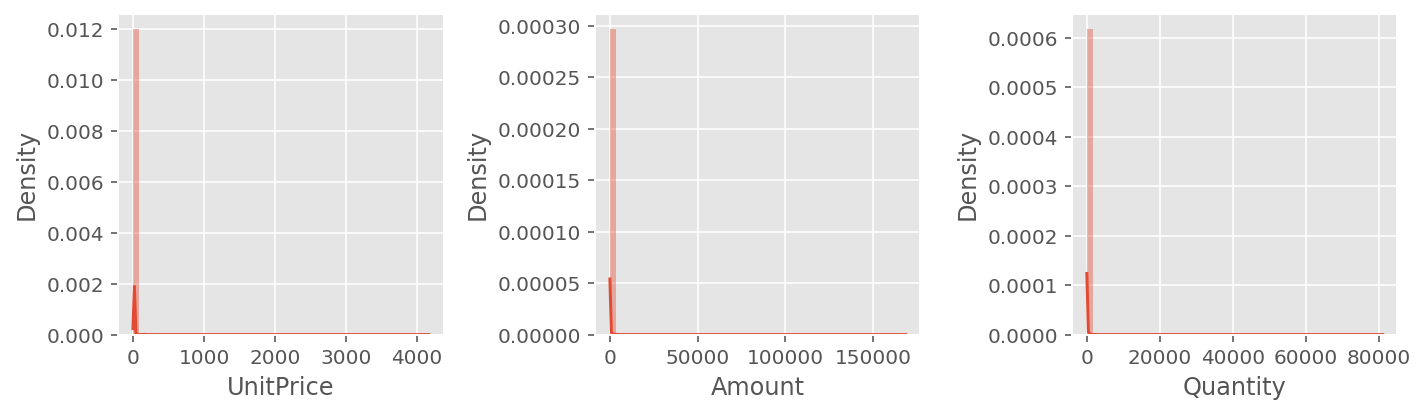

In [21]:
# lets check for unit price
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.distplot(retail_train.UnitPrice)

plt.subplot(1,3,2)
sns.distplot(retail_train.Amount)

plt.subplot(1,3,3)
sns.distplot(retail_train.Quantity)

plt.tight_layout()
plt.show()

- unit price is highly right skewed. there are some zero value present. we need to transform this variable during data preprocessing steps.

- distributions of Amount and Quantity are also rightly skewed.

In [22]:
# lets see how much data we have 

print(f"FROM: {retail_train['InvoiceDate'].min()}")
print(f"TO: {retail_train['InvoiceDate'].max()}")

FROM: 2010-12-01 08:26:00
TO: 2011-12-09 12:50:00


we have 1 year of data from 2010 december to 2011 december 

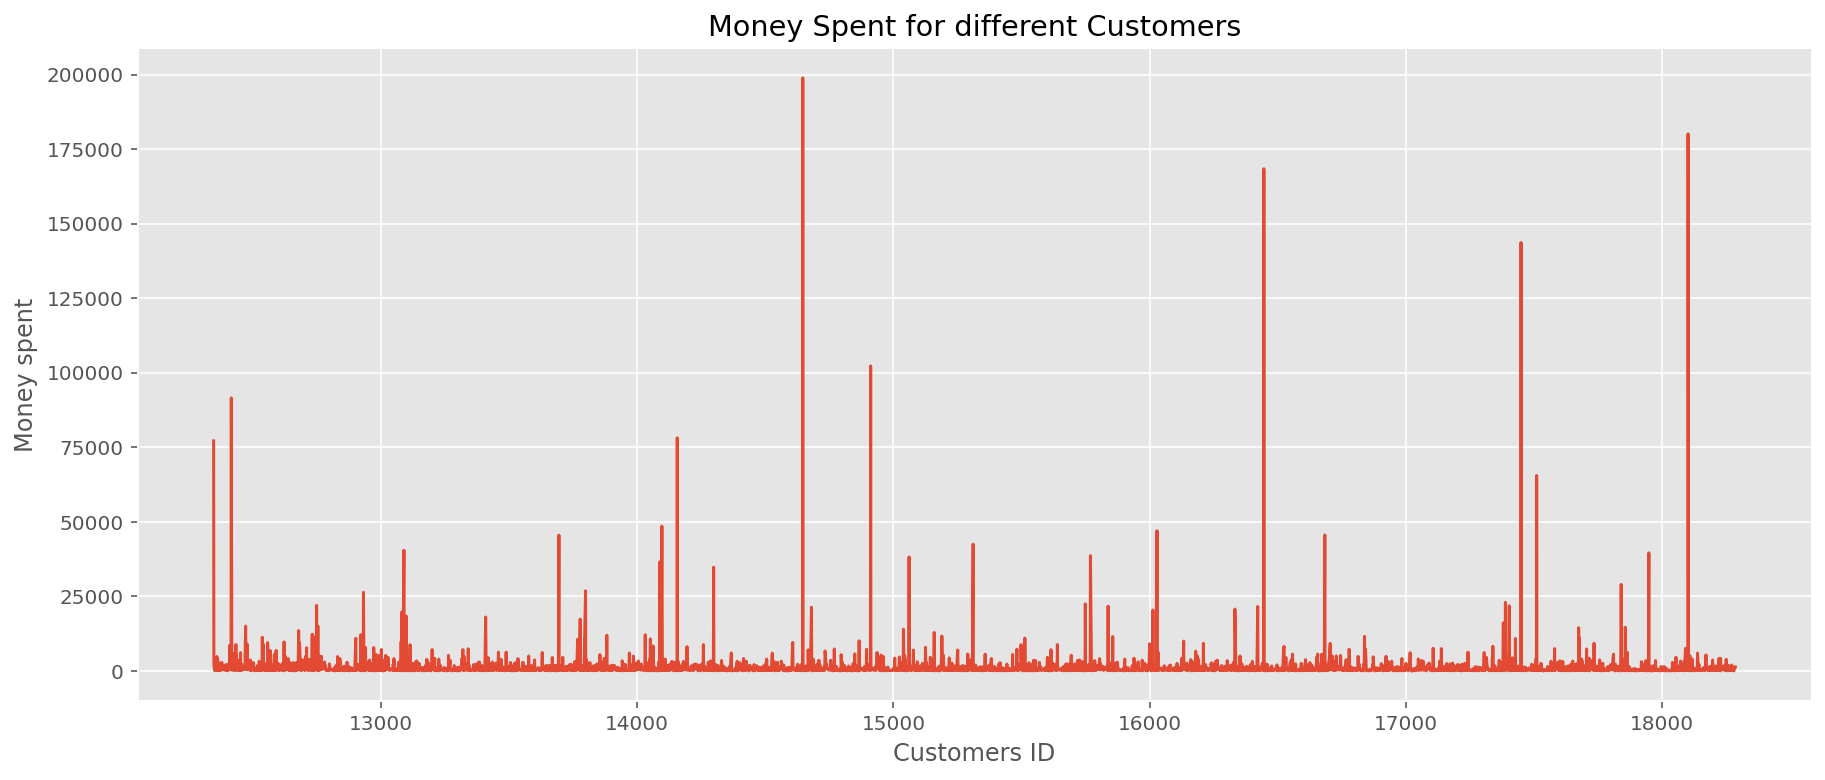

In [23]:
# lets check for how much customer spent?

money_spent = retail_train.groupby(by=['CustomerID','Country'], as_index=False)['Amount'].sum()

plt.figure(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount)
plt.xlabel('Customers ID')
plt.ylabel('Money spent')
plt.title('Money Spent for different Customers')
plt.show()

In [24]:
# lets find out top 10 customers who spent most

money_spent.sort_values("Amount",ascending=False).head(10)

,CustomerID,Country,Amount
1689,14646,23,198941.69
4179,18102,35,180157.49
2998,16446,35,168470.85
3711,17450,35,143745.05
1879,14911,10,102313.90
57,12415,0,91600.73
1336,14156,10,78212.84
0,12346,35,77183.60
3754,17511,35,65574.04
1292,14096,35,48563.77


- Customer no **14646** from country **23** had spent most.
- we can also see 6 customers from country 35 in top 10.

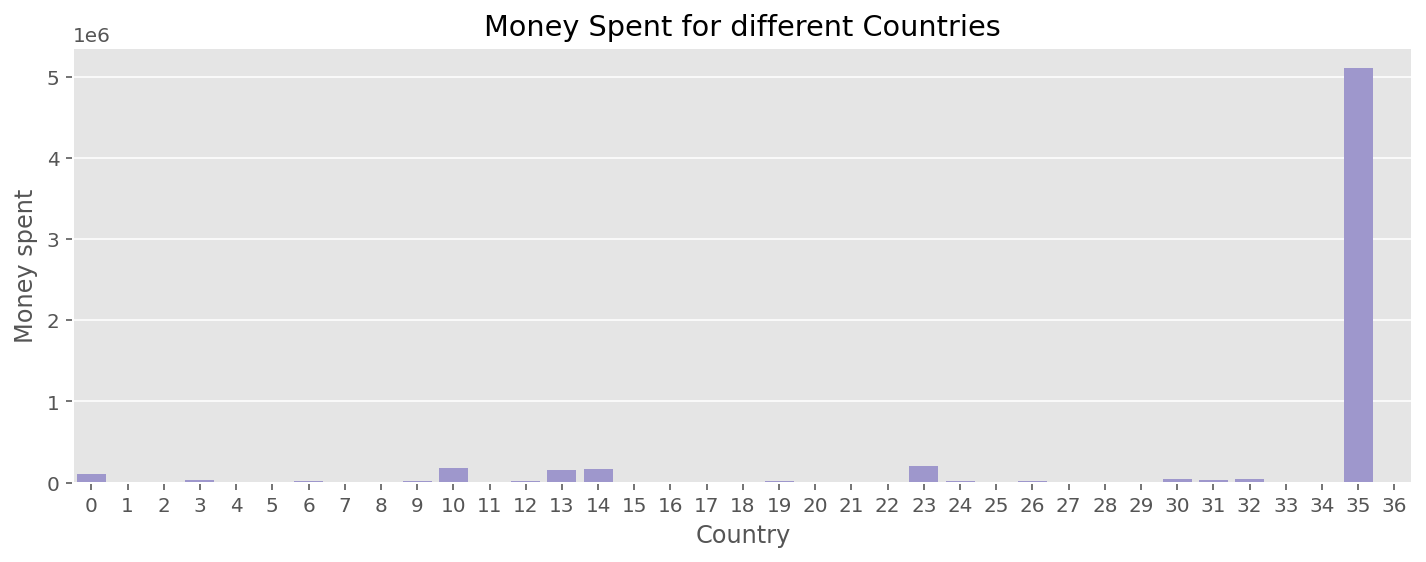

In [25]:
# lets check for which country spent most?

money_spent = retail_train.groupby(by=['Country'], as_index=False)['Amount'].sum()

plt.figure(figsize=(12,4))
sns.barplot(money_spent.Country, money_spent.Amount,color=color_pal[2])
plt.xlabel('Country')
plt.ylabel('Money spent')
plt.title('Money Spent for different Countries')
plt.show()

retail store's very large amount of revenue is generated from country 35. maybe their headquarters situated in country 35. 

- 

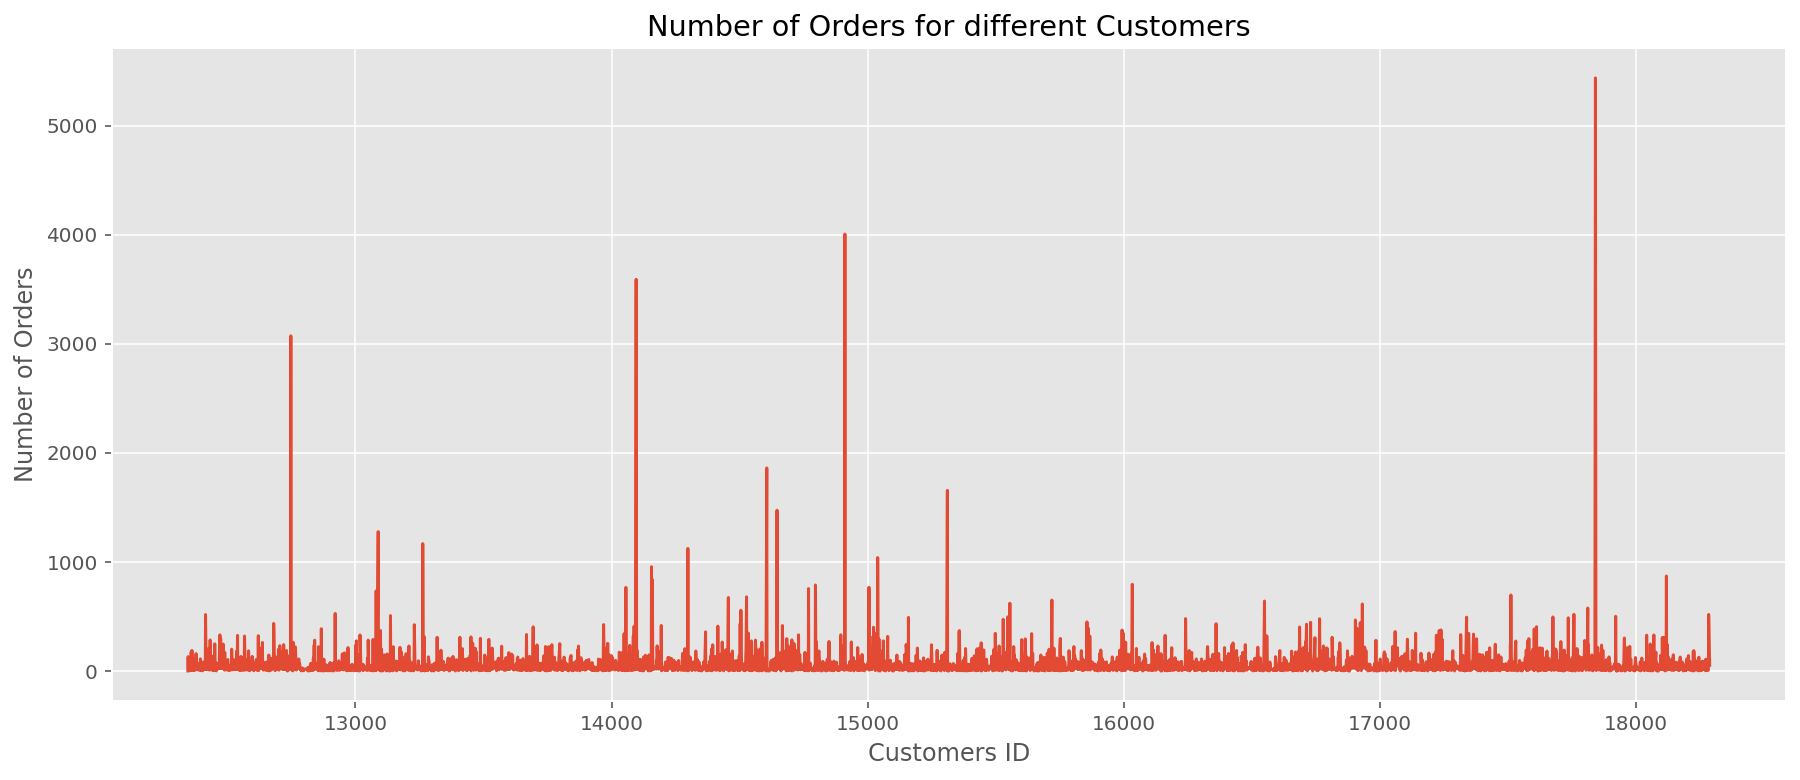

In [26]:
# lets check which customer give more orders 

orders = retail_train.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.figure(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo,color=color_pal[0])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [27]:
orders.columns = ["CustomerID",	"Country"	,"Number_of_orders"]
orders.sort_values("Number_of_orders",ascending=False).head(10)

,CustomerID,Country,Number_of_orders
3992,17841,35,5437
1879,14911,10,4006
1292,14096,35,3591
334,12748,35,3073
1661,14606,35,1862
2175,15311,35,1656
1689,14646,23,1474
570,13089,35,1278
698,13263,35,1168
1435,14298,35,1124


- Customer no **17841** from country **35** had ordered most.
- we can also see 8 customers from country 35 in top 10.

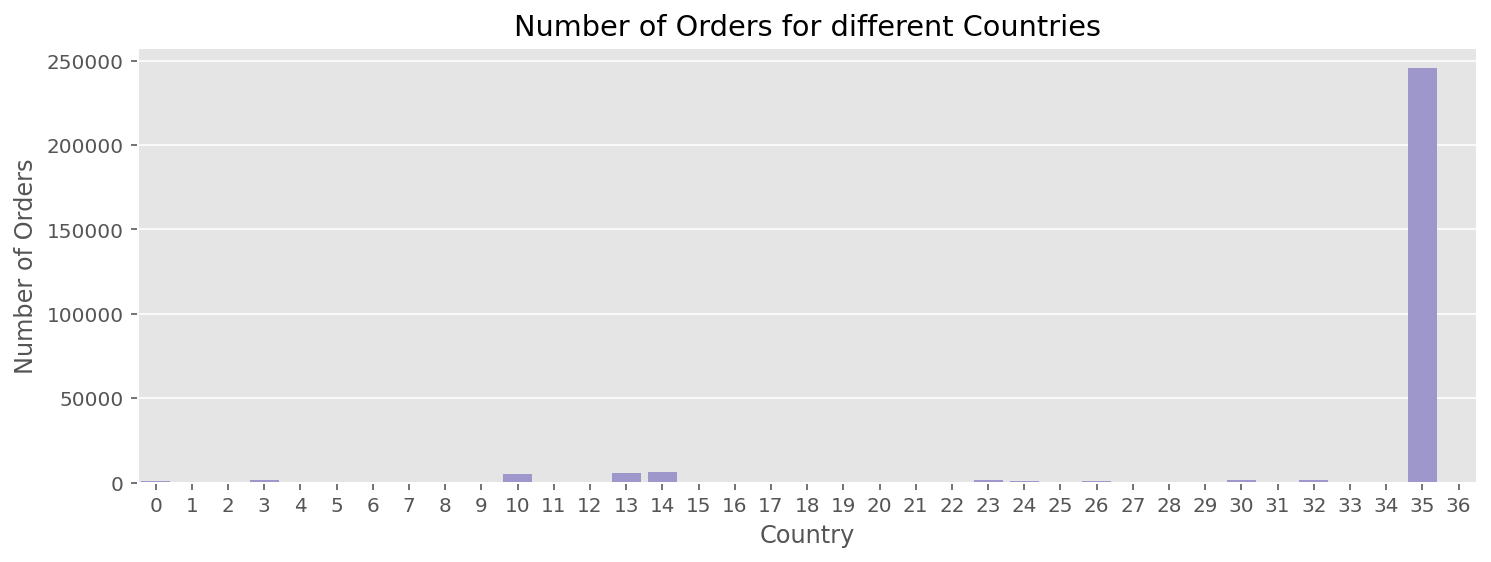

In [28]:
# lets check for which country orders most?

orders = retail_train.groupby(by=['Country'], as_index=False)['InvoiceNo'].count()

plt.figure(figsize=(12,4))
sns.barplot(orders.Country, orders.InvoiceNo,color=color_pal[2])
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Countries')
plt.show()

- number of Orders from country 35 is dominating.

In [29]:
# lets check how store performs over the time period
# performance based on number of orders


performance = pd.DataFrame(retail_train.groupby("InvoiceNo")["year_month"].unique().value_counts())
interval = [ i[0] for i in performance.index]
performance.columns = ["Orders"]
performance["Interval"] = interval
performance.reset_index(drop=True)
pass

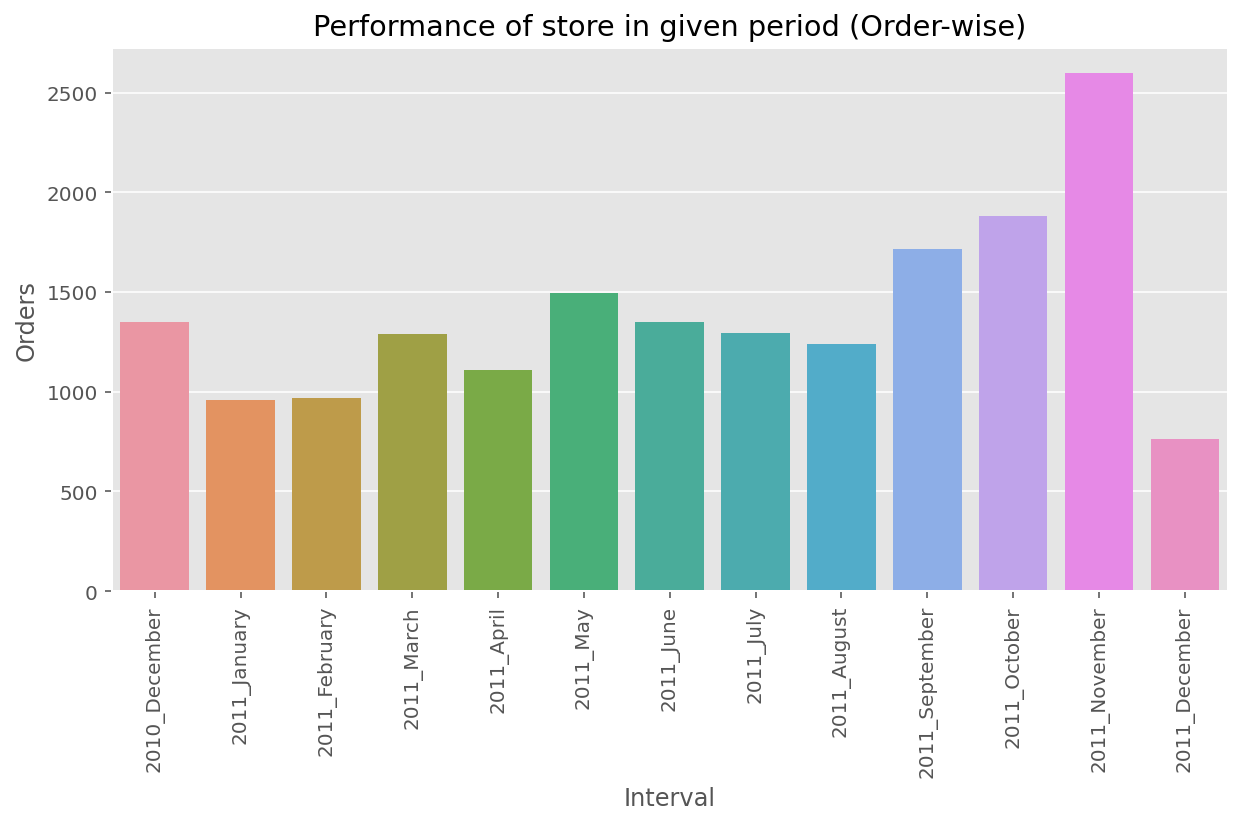

In [53]:
order = ['2010_December','2011_January','2011_February','2011_March','2011_April','2011_May','2011_June','2011_July',
         '2011_August','2011_September','2011_October','2011_November','2011_December']
plt.figure(figsize=(10,5))
sns.barplot(y=performance.Orders,x=performance.Interval,order=order)
plt.title("Performance of store in given period (Order-wise)")
plt.xticks(rotation=90)
plt.show()

- we have data till 9th of december 2011, so lets not consider december 2011.
- in november 2011 retail store got the highest orders followed by, october 2011 and september 2011.
- in month of januvary and february store got lowest number of orders.

In [31]:
# lets check on which day they received how much orders

performance_day = pd.DataFrame(retail_train.groupby("InvoiceNo")["Day"].unique().value_counts())
interval = [ i[0] for i in performance_day.index]
performance_day.columns = ["Orders"]
performance_day["Interval"] = interval
performance_day.reset_index(drop=True)
pass

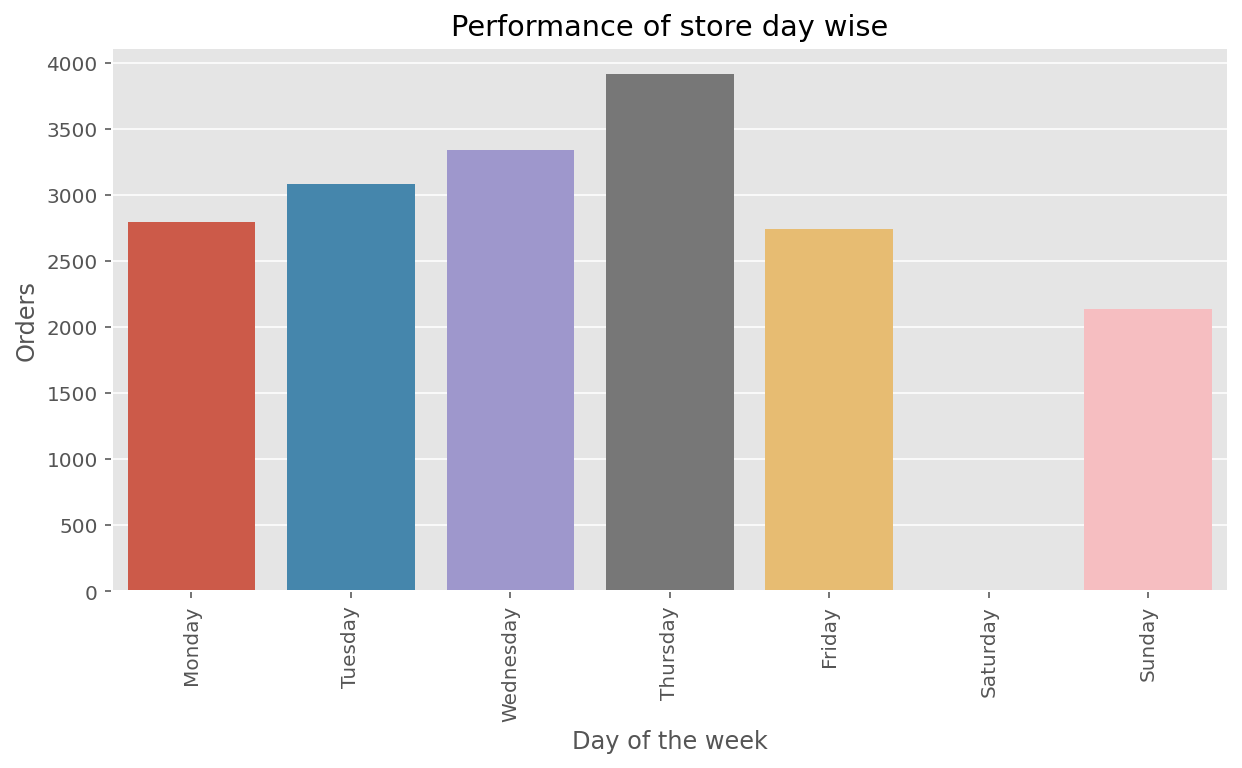

In [54]:
order_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5))
sns.barplot(y=performance_day.Orders,x=performance_day.Interval,order=order_day)
plt.title("Performance of store day wise")
plt.xlabel("Day of the week")
plt.xticks(rotation=90)
plt.show()

- we can see on thursday is very busy day for the retail store. as they receive highest number of orders.
- there is no order on saturday, maybe store is closed on saturday.
- we can also see that, there is an increasing trend from monday to thursday, and at weekends it is decreasing.

In [33]:
# lets findout busiest hours of the retail store

performance_hour = pd.DataFrame(retail_train.groupby("InvoiceNo")["Hour"].unique().value_counts())
performance_hour = performance_hour.iloc[0:14,:]
interval = [ i[0] for i in performance_hour.index]
performance_hour.columns = ["Orders"]
performance_hour["Interval"] = interval
performance_hour.reset_index(drop=True,)
performance_hour.sort_values("Interval", inplace=True)

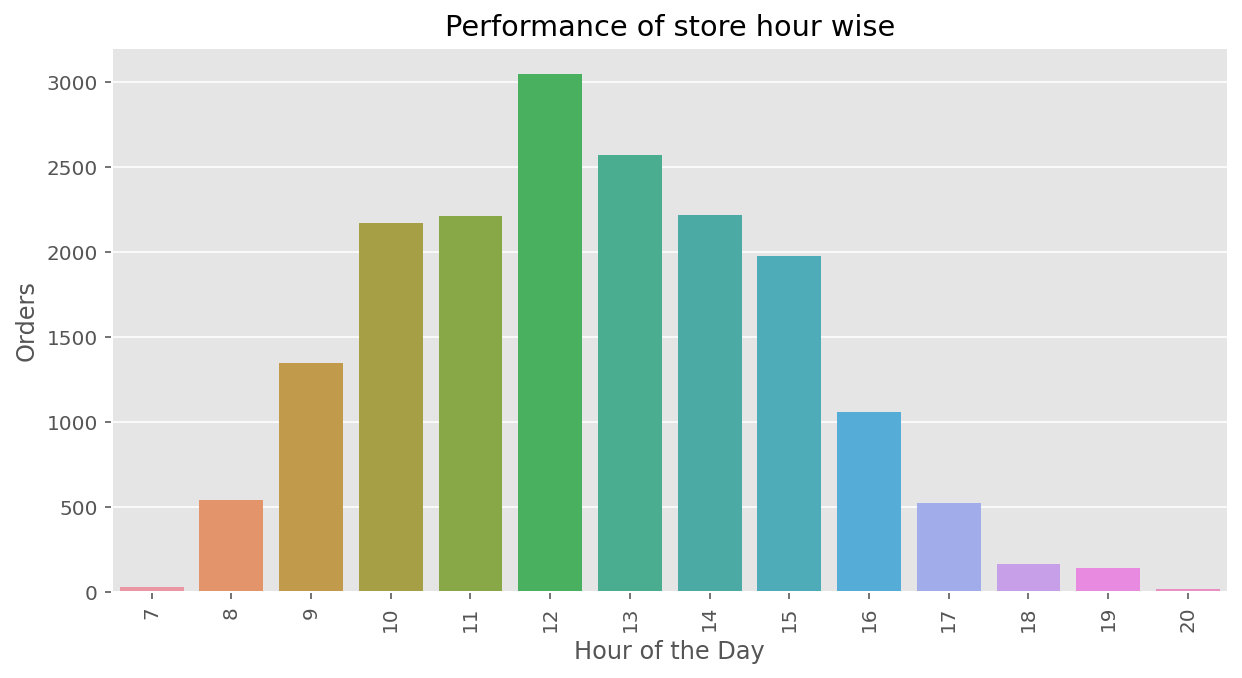

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(y=performance_hour.Orders,x=performance_hour.Interval)
plt.title("Performance of store hour wise")
plt.xlabel("Hour of the Day")
plt.xticks(rotation=90)
plt.show()

- retail store is opened at 7 o'clock in the morning and close at 9 o'clock at night.
- morning 10 to afternoon 3 looks like a busy period for the store, and 12th hour is the busiest hour.

In [35]:
# lets check for performance based on  revenue

revenue = pd.DataFrame(retail_train.groupby("year_month")["Amount"].sum())
revenue["Interval"] = revenue.index
revenue.reset_index(drop=True)
pass

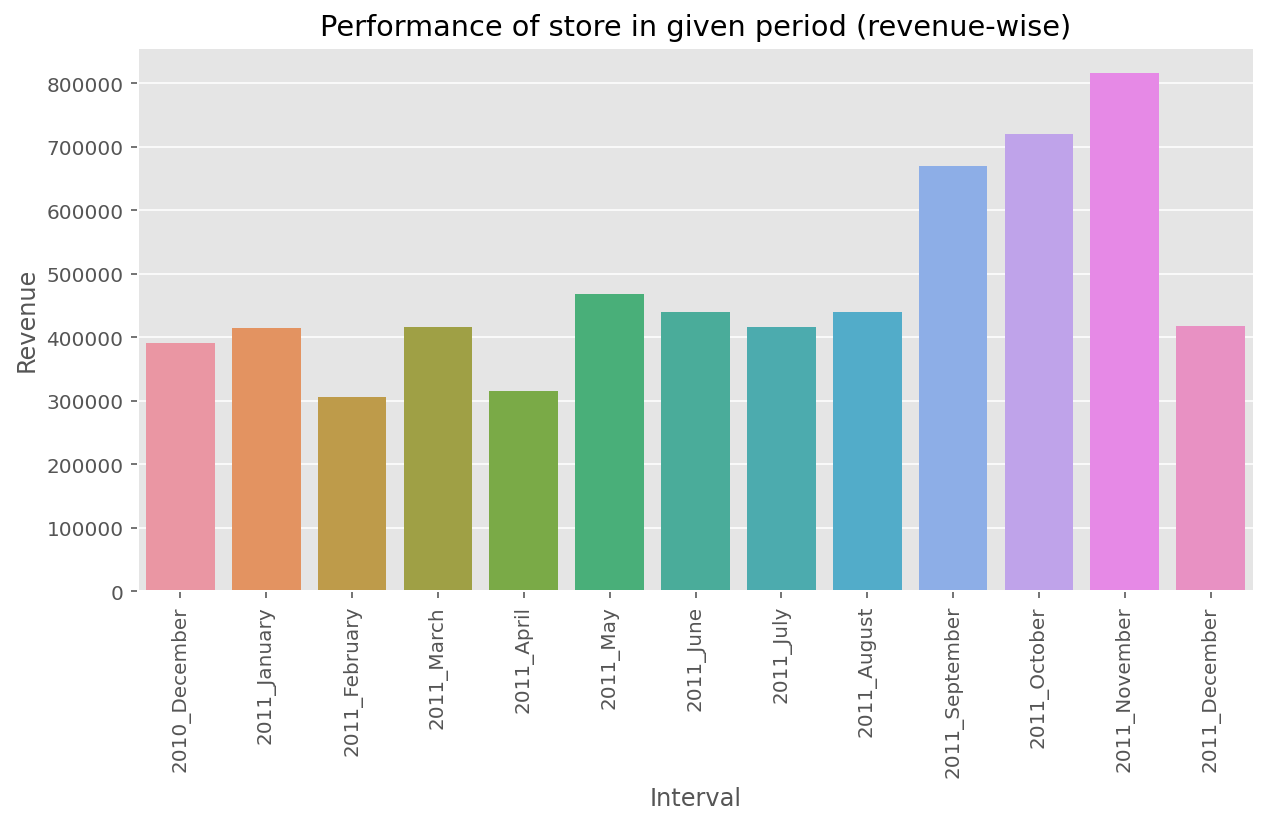

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(y=revenue.Amount,x=revenue.Interval,order=order)
plt.title("Performance of store in given period (revenue-wise)")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

- in november 2011 retail store generated highest revenue, followed by october 2011 and september 2011.
- in February and april 2011 store generated lowest revenue.

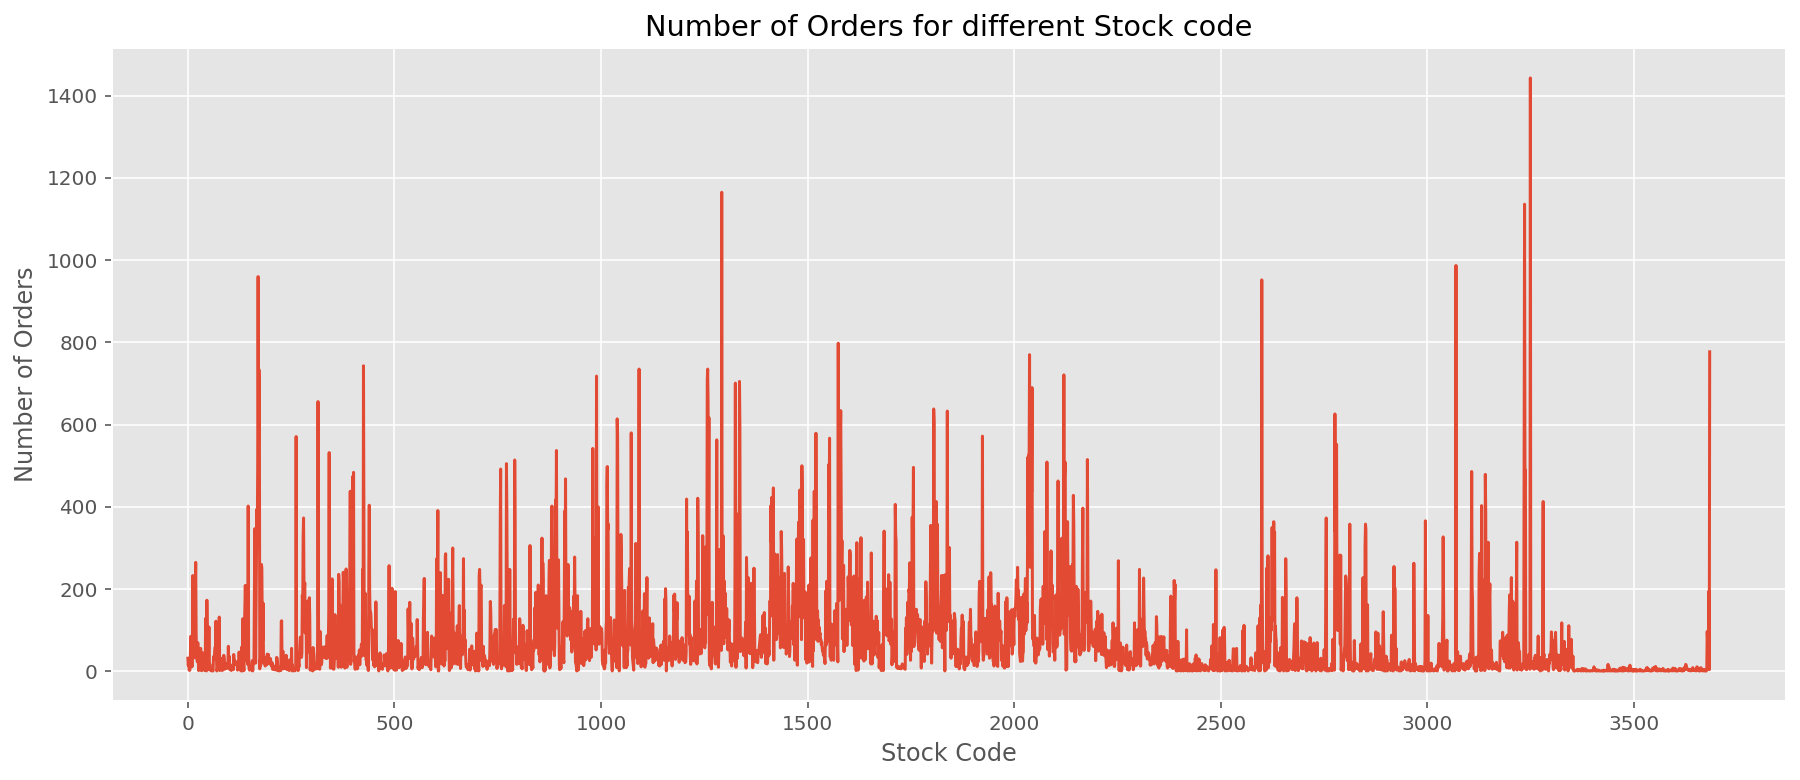

In [37]:
# lets check which product is popular

top_10_products = retail_train.groupby(by=['StockCode'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(top_10_products.StockCode, top_10_products.InvoiceNo,color=color_pal[0])
plt.xlabel('Stock Code')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Stock code')
plt.show()

In [38]:
top_10_products.columns = ["StockCode","Number_of_times_Ordered"]
top_10_products.sort_values("Number_of_times_Ordered",ascending=False).head(10)

,StockCode,Number_of_times_Ordered
3193,3249,1443
1271,1292,1165
3180,3235,1136
3023,3069,987
163,170,960
2570,2599,952
1553,1574,798
3597,3683,777
2016,2037,770
414,425,743


- product with stock code 3249 is popular. ordered 1443 times.

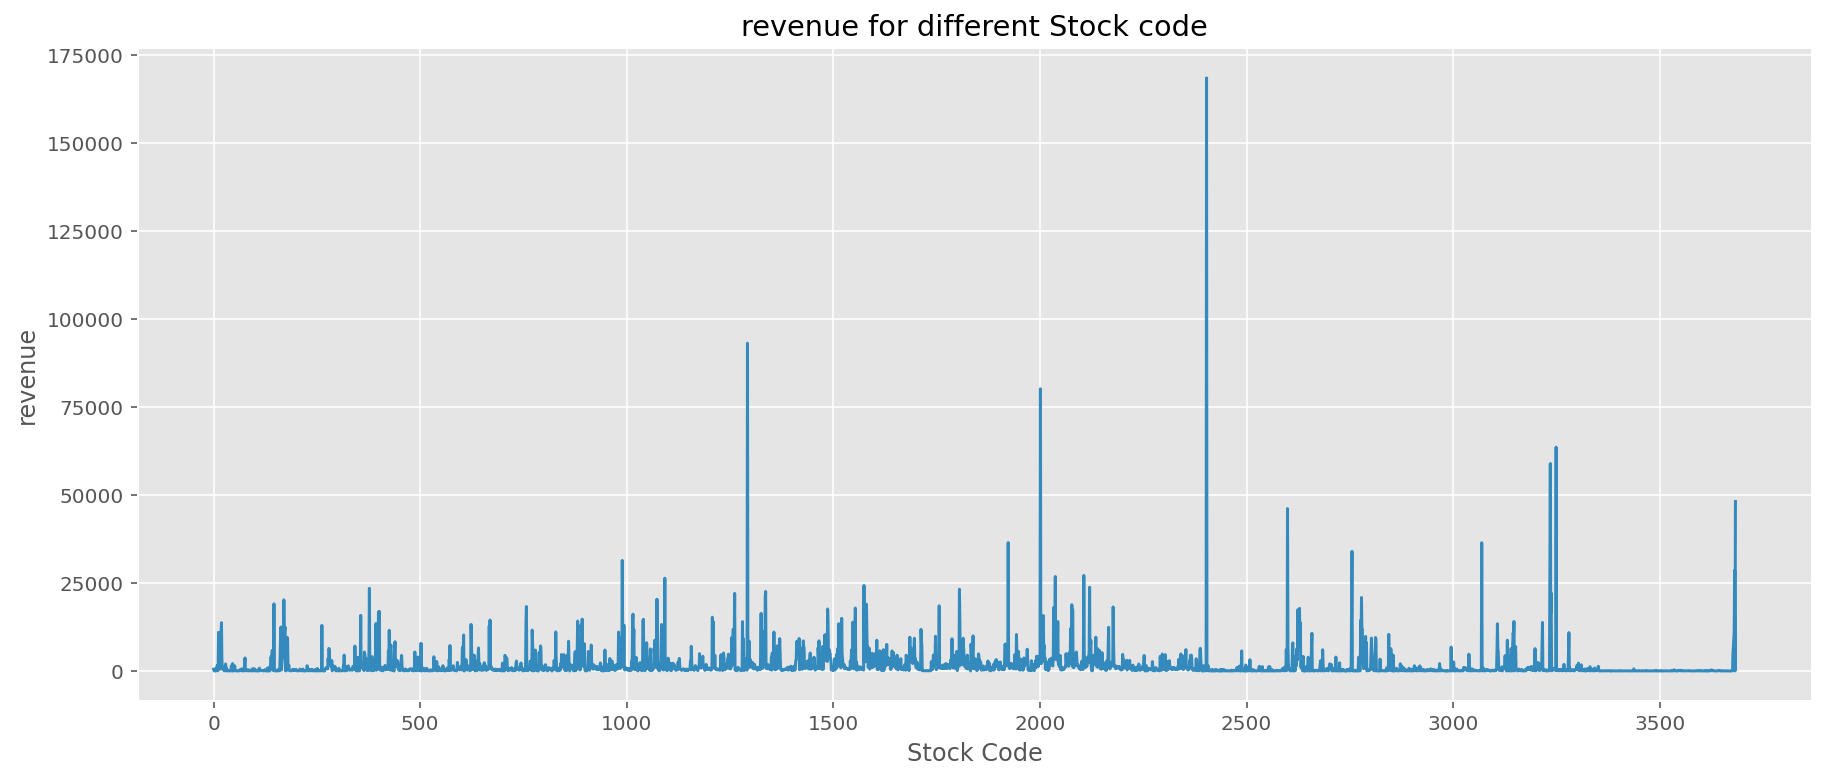

In [39]:
# lets check how much revenue each product generates.

top_10_products_revenue = retail_train.groupby(by=['StockCode'], as_index=False)['Amount'].sum()

plt.subplots(figsize=(15,6))
plt.plot(top_10_products_revenue.StockCode, top_10_products_revenue.Amount,color=color_pal[1])
plt.xlabel('Stock Code')
plt.ylabel('revenue')
plt.title('revenue for different Stock code')
plt.show()

In [40]:
top_10_products_revenue.columns = ["StockCode","revenue"]
top_10_products_revenue.sort_values("revenue",ascending=False).head(10)

,StockCode,revenue
2381,2403,168469.60
1271,1292,93098.02
1980,2001,80141.60
3193,3249,63571.80
3180,3235,58920.57
3597,3683,48156.77
2570,2599,46105.13
1902,1923,36450.69
3023,3069,36411.15
2721,2755,33977.87


- above we can see top 10 revenue generating products.
- product with stock code 2403 generates highest revenue.

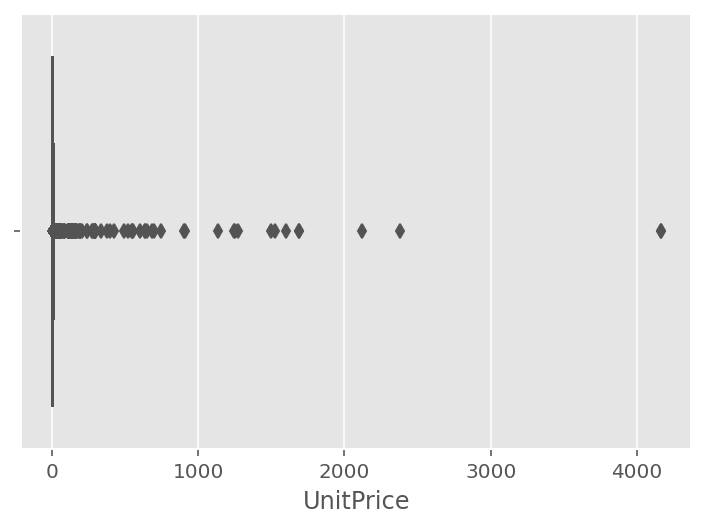

In [41]:
# lets explore Unit prices feature

sns.boxplot(retail_train.UnitPrice)

Unit price contains very high outliers. intersetingly we can see some of the products have unit price zero. lets check more about them.

In [42]:
# creating dataframe of free products

free_df = retail_train[retail_train["UnitPrice"]==0]
print(free_df.shape)
free_df.head() 

(34, 14)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Hour,year_month
15291,15305,3681,2140,1,2011-11-03 13:24:00,0.0,12437,13,0.0,2011,November,Thursday,13,2011_November
26477,17360,3034,248,12540,2011-11-25 15:57:00,0.0,13256,35,0.0,2011,November,Friday,15,2011_November
35916,10019,1805,1738,11,2011-07-28 17:09:00,0.0,12507,30,0.0,2011,July,Thursday,17,2011_July
47866,16621,1330,1585,4,2011-11-17 19:52:00,0.0,15602,35,0.0,2011,November,Thursday,19,2011_November
57601,13438,1631,1434,2,2011-10-06 08:17:00,0.0,15804,35,0.0,2011,October,Thursday,8,2011_October


In [43]:
# lets check how many such products are there
len(free_df.StockCode.unique())

30

so there are 30 products which were given for free.


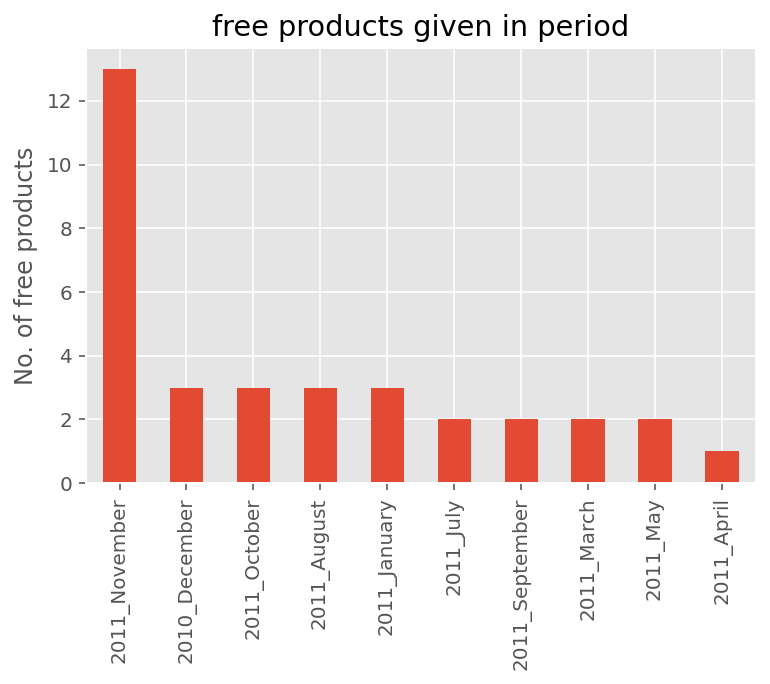

In [44]:
free_df.year_month.value_counts().plot(kind="bar")
plt.ylabel("No. of free products")
plt.title("free products given in period")
plt.show()

- In November 2011, retail store gave 13 products for free. we dont know why the unit price is zero. 
- may be they were given to older customer, as a reward for loyalty. or may be retail store is doing some give away to lucky customers, like some kind of lottery or may be.... 

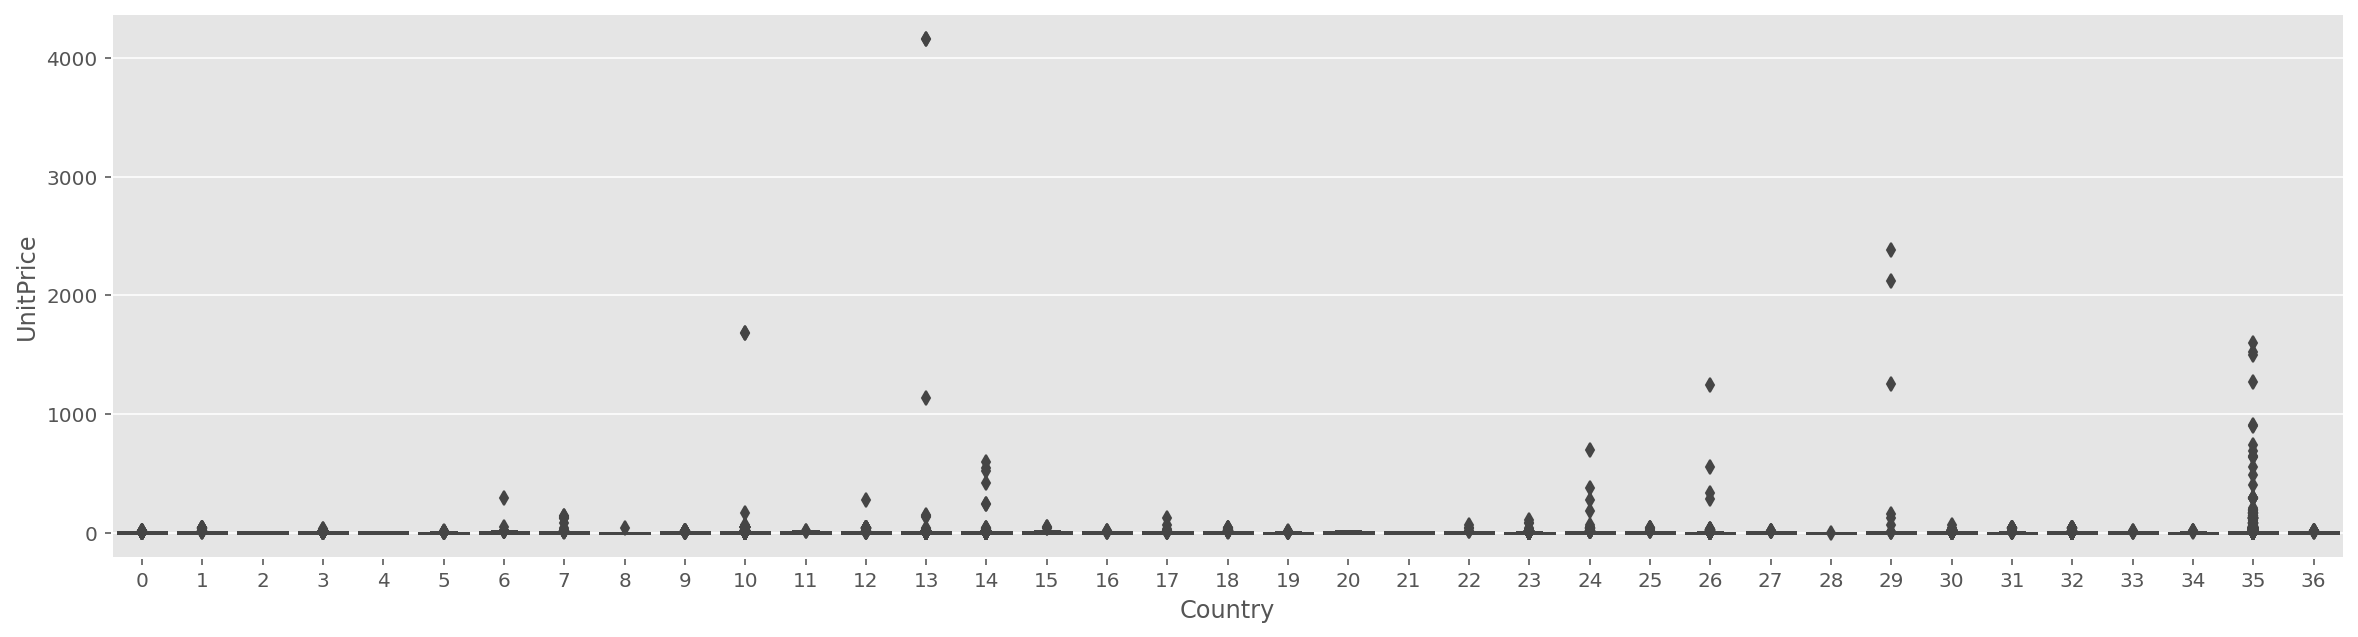

In [45]:
# now lets check if there is any connection between unit price and countries

plt.figure(figsize=(20,5))
sns.boxplot(x=retail_train.Country, y=retail_train.UnitPrice)

due to high outliers, cant see anythin here, lets create do a cut off to keep outliers out of analysis.

In [46]:
retail_train["UnitPrice"].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99,0.999])

count    276006.000000
mean          3.078443
std          16.576868
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
99.9%        41.743550
max        4161.060000
Name: UnitPrice, dtype: float64

99.9% cut off looks good for analysis. we are only 0.1% data not considering in analysis.

In [47]:
q = retail_train.UnitPrice.quantile(0.999)
cut_off_df = retail_train[retail_train["UnitPrice"]<q]

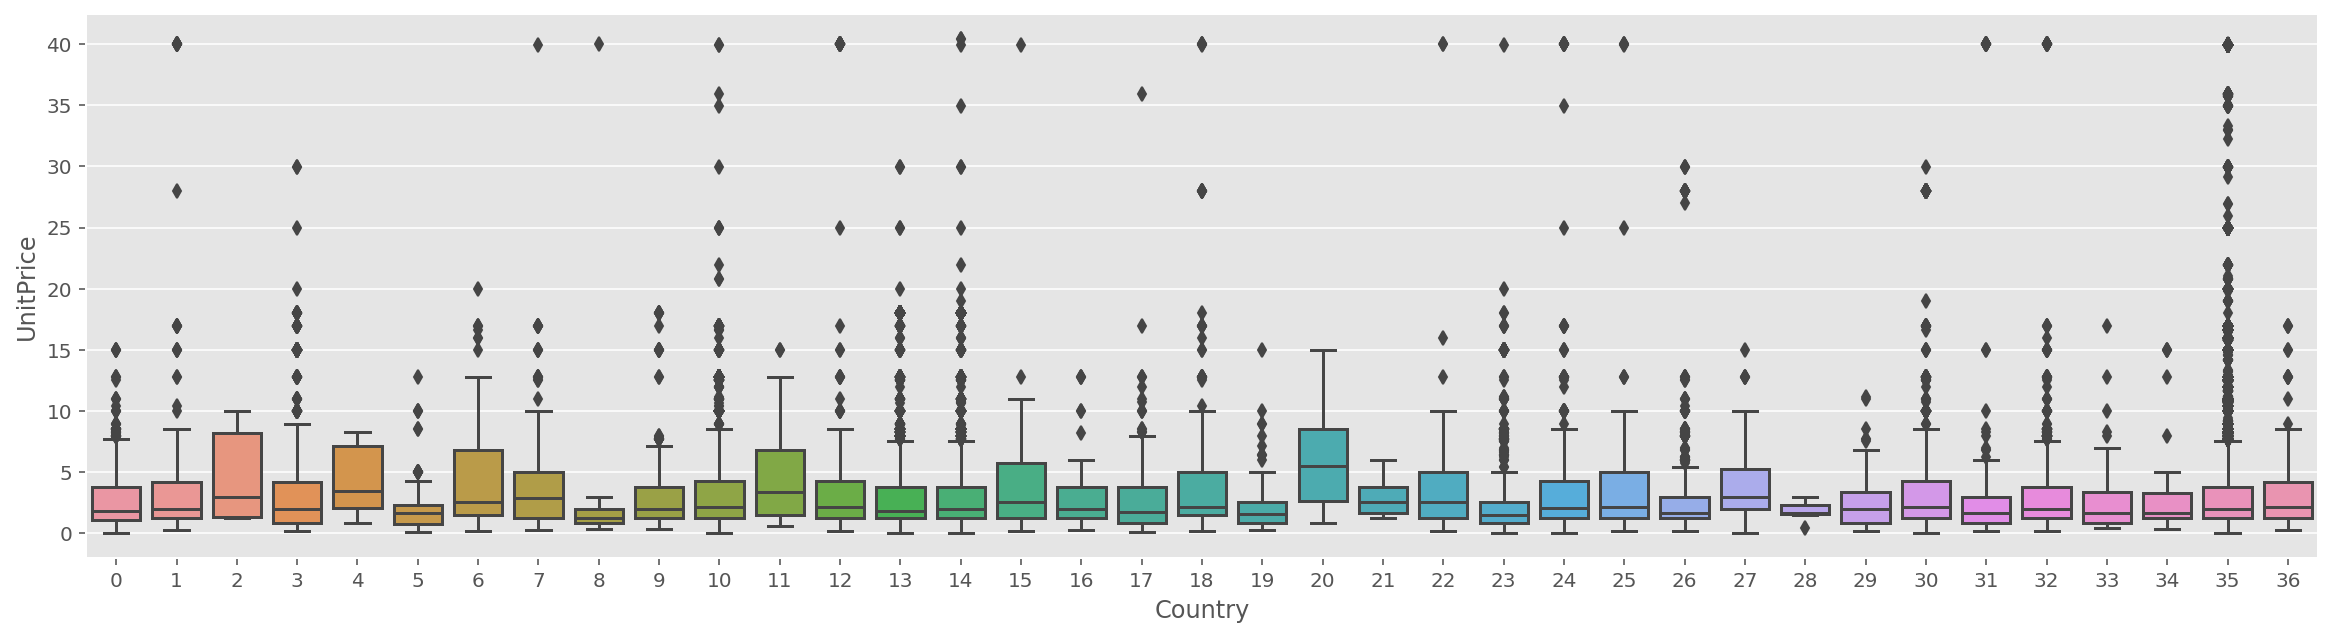

In [48]:
plt.figure(figsize=(20,5))
sns.boxplot(x=cut_off_df.Country, y=cut_off_df.UnitPrice)

- it looks like,  on an average unit price is different for different countires. but retail store is not selling every product in each and every country. majority of their product they are selling in country 35. 
- things are not very clear from above graph, that how a unit price is affected country wise.

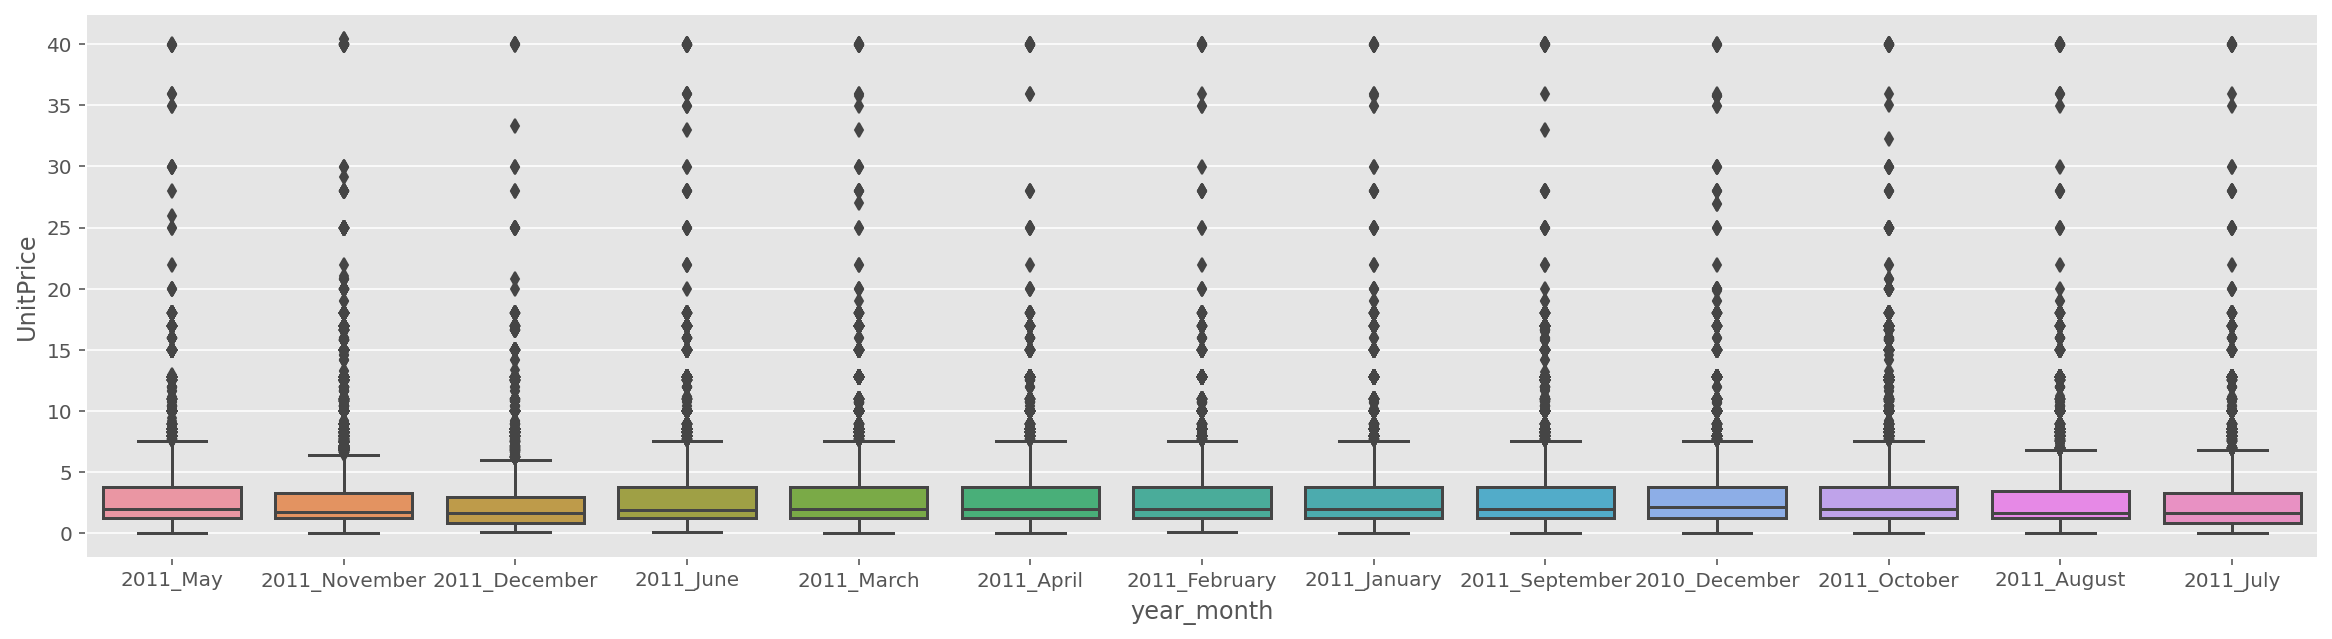

In [49]:
# lets check if on an average unit price changes per month 
plt.figure(figsize=(20,5))
sns.boxplot(x=cut_off_df.year_month, y=cut_off_df.UnitPrice,)

on an average unit price looks same, not a significant change.

In [50]:
retail_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Hour,year_month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056,35,11.25,2011,May,Friday,16,2011_May
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098,35,11.70,2011,May,Wednesday,7,2011_May
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044,35,23.80,2011,November,Sunday,13,2011_November
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525,35,0.83,2011,November,Tuesday,12,2011_November
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952,35,19.80,2011,May,Friday,9,2011_May


In [51]:
# lets check for customer frequency based on training data

frequency = retail_train.groupby("CustomerID",as_index=False)["InvoiceNo"].count()

# since we have a years worth data, lets call a customer a frequent one, if he visits store more than or equal to 52 times.
# i.e. on an average per week visit
frequency["frequent"] = frequency.InvoiceNo.apply(lambda x: 'Frequent' if x >= 52 else "Not_Frequent")

# list of frequent customers
frequent_cust_list = frequency[frequency["frequent"]=="Frequent"]["CustomerID"].values

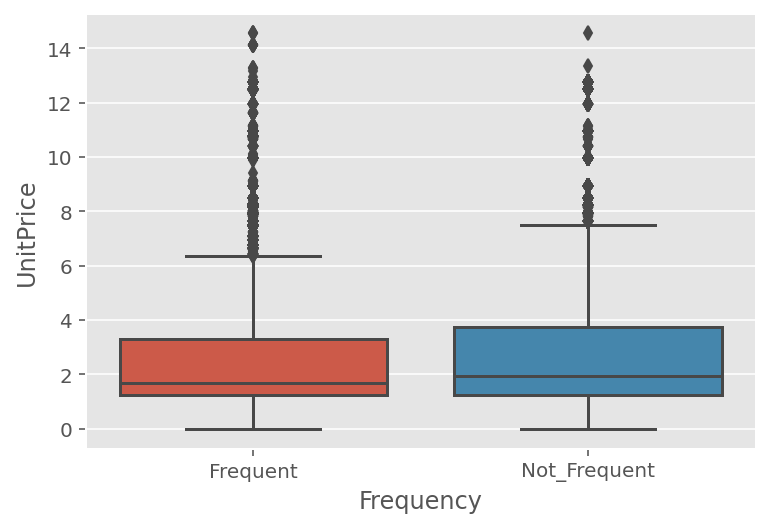

In [52]:
train = retail_train.copy()

# applyin changes to main data
train["Frequency"] = train.CustomerID.apply(lambda x: "Frequent" if x in frequent_cust_list else "Not_Frequent")

# taking 99 percentile cut off since data is skewed
q = train.UnitPrice.quantile(0.99)
cut_off = train[train["UnitPrice"]<q]

# checking if frequency of customer affects unit price
sns.boxplot(x=cut_off.Frequency, y=cut_off.UnitPrice)

- we can see for frequent customers median unit price is slightly lower as compared to non frequent customers.
- since most of products are low range products, this slight difference might be helpful for predecting Unit prices.